In [1]:
#| default_exp anchors

In [2]:
#| export 
import torch
import torch.nn as nn
from typing import List
from monai.apps.detection.utils.anchor_utils import AnchorGenerator
from monai.utils import look_up_option

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
#| export 
class AnchorGeneratorBasedonStride(AnchorGenerator):
    __annotations__ = {"cell_anchors": List[torch.Tensor]}

    def __init__(
        self,
        strides: List[int],
        spatial_dims: int = 3,
        indexing: str = "ij",
    ):
        nn.Module.__init__(self)
        self.strides = strides
        self.spatial_dims = look_up_option(spatial_dims, [2, 3])
        self.indexing = look_up_option(indexing, ["ij", "xy"])
        self.cell_anchors = [torch.Tensor([0.0] * len(stride) + stride).reshape(1, -1) for stride in strides]

In [28]:
x = AnchorGeneratorBasedonStride(strides=[[2, 4, 4]])
x

AnchorGeneratorBasedonStride()

In [29]:
images = torch.zeros((1, 1, 12, 16, 16))
feature_maps = [torch.zeros((1, 96, 6, 4, 4))]
anchors = x.forward(images, feature_maps)[0]
anchors.shape

torch.Size([96, 6])

In [31]:
anchors.shape

torch.Size([96, 6])

In [78]:
axes = [12, 16, 16]
data = np.ones(axes, dtype=np.bool_)
 
colors = np.empty(axes + [4], dtype=np.float32)
data.shape, colors.shape

((12, 16, 16), (12, 16, 16, 4))

In [80]:
anchors[0]

tensor([0., 0., 0., 2., 4., 4.])

In [81]:
for i in anchors:
    z1, y1, x1, z2, y2, x2 = i.numpy().astype(int)
    colors[z1:z2, y1:y2, x1:x2, :] = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), 0.7]
colors.shape

(12, 16, 16, 4)

In [84]:
colors[2, 0, 0, :]

array([0.5579897, 0.9250685, 0.4682049, 0.7      ], dtype=float32)

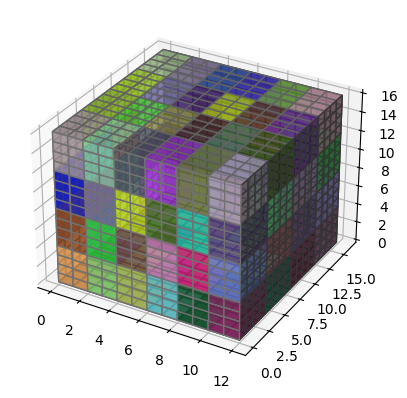

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.show()

In [4]:
x = AnchorGeneratorBasedonStride(strides=[[1, 2, 2], [2, 4, 4], [4, 8, 8], [8, 16, 16]])
images = torch.zeros((1, 1, 96, 192, 192))
feature_maps = [torch.zeros((1, 6, 96, 96, 96)), \
                torch.zeros((1, 6, 48, 48, 48)),\
                torch.zeros((1, 6, 24, 24, 24)), \
                torch.zeros((1, 6, 12, 12, 12))]
anchors = x.forward(images, feature_maps)[0]

In [5]:
anchors.shape

torch.Size([1010880, 6])

In [6]:
x = AnchorGeneratorBasedonStride(strides=[[2, 4, 4], [4, 8, 8], [8, 16, 16]])
images = torch.zeros((1, 1, 96, 192, 192))
feature_maps = [torch.zeros((1, 6, 48, 48, 48)), torch.zeros((1, 6, 24, 24, 24)), torch.zeros((1, 6, 12, 12, 12))]
anchors = x.forward(images, feature_maps)[0]

In [7]:
anchors.shape

torch.Size([126144, 6])

tensor([[  0.,   0.,   0.,   2.,   4.,   4.],
        [  0.,   0.,   4.,   2.,   4.,   8.],
        [  0.,   0.,   8.,   2.,   4.,  12.],
        ...,
        [ 88., 176., 144.,  96., 192., 160.],
        [ 88., 176., 160.,  96., 192., 176.],
        [ 88., 176., 176.,  96., 192., 192.]])

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()